In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('C_DAR.xlsx')
data.head()

,Gender,Bracing_age,Before.bracing.Cobb,C_DAR,Bracing.Risser.sign,Best.In_brace.Correction,Twoyears.follow_up.Cobb,Outcome,Unnamed: 8
0,2,14,25,3.5,2,44.000000,30.0,1.0,NaN
1,1,12,45,8.0,1,15.555556,NaN,2.0,NaN
2,2,13,38,4.7,2,47.368421,48.0,1.0,NaN
3,2,13,34,5.6,2,61.764706,30.0,1.0,NaN
4,2,14,28,4.6,1,64.285714,30.0,1.0,NaN


In [3]:
data.pop('Unnamed: 8')
data.head()

,Gender,Bracing_age,Before.bracing.Cobb,C_DAR,Bracing.Risser.sign,Best.In_brace.Correction,Twoyears.follow_up.Cobb,Outcome
0,2,14,25,3.5,2,44.000000,30.0,1.0
1,1,12,45,8.0,1,15.555556,NaN,2.0
2,2,13,38,4.7,2,47.368421,48.0,1.0
3,2,13,34,5.6,2,61.764706,30.0,1.0
4,2,14,28,4.6,1,64.285714,30.0,1.0


In [4]:
no_label_data = []
labled_data = []
for i in range(len(data)):
    if(data.isna().iloc[i,-1] or data.isna().iloc[i,-2]):
        no_label_data.append(data.iloc[i])
    else:
        labled_data.append(data.iloc[i])
        
labled_data = pd.DataFrame(labled_data)
no_label_data = pd.DataFrame(no_label_data)

for i in range(len(labled_data)): 
    if int(labled_data.iloc[i,-1]) == 1 :
        labled_data.iloc[i,-1] = 0
    elif int(labled_data.iloc[i,-1]) == 2:
        labled_data.iloc[i, -1]=1
    else:
        print('Erorr',i,"  -> ",labled_data.iloc[i, -1])
        
#     if labled_data.iloc[i,-2] < 50 :
#         labled_data.iloc[i,-2] = 0
#     else:
#         labled_data.iloc[i, -2]=1
    
    
print(f'we have {len(no_label_data)} data without label')
print(f'and {len(labled_data)} of our data have labels')

we have 68 data without label
and 96 of our data have labels


In [5]:
no_label_data

,Gender,Bracing_age,Before.bracing.Cobb,C_DAR,Bracing.Risser.sign,Best.In_brace.Correction,Twoyears.follow_up.Cobb,Outcome
1,1.0,12.0,45.0,8.00,1.0,15.555556,NaN,2.0
7,2.0,13.0,40.0,8.00,2.0,12.500000,NaN,2.0
10,2.0,11.0,44.0,5.70,1.0,9.090909,NaN,2.0
11,2.0,13.0,45.0,8.00,2.0,15.555556,NaN,2.0
15,2.0,13.0,45.0,9.20,2.0,20.000000,NaN,2.0
...,...,...,...,...,...,...,...,...
159,2.0,13.0,40.0,6.66,2.0,40.000000,NaN,NaN
160,2.0,12.0,34.0,4.80,2.0,58.823529,NaN,NaN
161,2.0,10.0,27.0,3.85,0.0,44.444444,NaN,NaN
162,1.0,11.0,40.0,4.00,0.0,40.000000,NaN,NaN


In [6]:
train , test = train_test_split(labled_data, test_size=.1)
train , val = train_test_split(train, test_size= .1)

In [7]:
def y_split(data):
    out_come = data.pop('Outcome')
    out_come = np.array(out_come)
    two_years_followup = data.pop("Twoyears.follow_up.Cobb")
    two_years_followup = np.array(two_years_followup)
    return (out_come, two_years_followup)

In [8]:
train_y = y_split(train)
val_y = y_split(val)
test_y = y_split(test)
final_output = y_split(no_label_data)

In [9]:
train_stats = train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Gender,77.0,1.831169,0.377059,1.000000,2.000000,2.000000,2.0,2.00
Bracing_age,77.0,12.142857,1.221671,10.000000,11.000000,12.000000,13.0,15.00
Before.bracing.Cobb,77.0,32.805195,6.819166,25.000000,26.000000,31.000000,38.0,45.00
C_DAR,77.0,5.720130,1.843164,2.500000,4.500000,5.500000,6.4,11.25
Bracing.Risser.sign,77.0,1.363636,0.705413,0.000000,1.000000,1.000000,2.0,2.00
Best.In_brace.Correction,77.0,47.926440,18.675895,11.111111,35.483871,44.444444,60.0,100.00


In [10]:
def norm(x):
    return ( x - train_stats['mean'] ) / train_stats['std']    

In [11]:
def dinorm(y):
    return y*train_stats['std'] + train_stats['mean']

In [12]:
train_x = norm(train)
val_x = norm(val)
test_x = norm(test)
norm_final = norm(no_label_data)

In [13]:
def base_model(inputs):    
    x = Dense(128, activation='relu')(inputs)
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    return x


def final_model(inputs):
    x = base_model(inputs)
    out_come = Dense(1, activation='sigmoid', name = 'out_come')(x)
    two_years_followup = Dense(1, activation=None, name = 'two_years_followup')(x)
    model = Model(inputs, [ out_come, two_years_followup] )
    return model

In [14]:
inputs = Input(shape=(6,))
model = final_model(inputs)

In [15]:
rms = tf.keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer= rms,
             loss = {'out_come' : 'binary_crossentropy',
                    'two_years_followup' : 'mse',
                    },
              metrics = {
                  'out_come' : 'accuracy',
                  'two_years_followup' : 'mse',
              },
             )

In [16]:
history = model.fit( train_x , train_y,
                    epochs = 1500,validation_data = (val_x, val_y))

Epoch 1/1500
3/3 [==============================] - 0s 144ms/step - loss: 1434.8055 - out_come_loss: 0.6934 - two_years_followup_loss: 1434.1122 - out_come_accuracy: 0.4805 - two_years_followup_mse: 1434.1122 - val_loss: 1306.4446 - val_out_come_loss: 0.6973 - val_two_years_followup_loss: 1305.7473 - val_out_come_accuracy: 0.1111 - val_two_years_followup_mse: 1305.7473
Epoch 2/1500
3/3 [==============================] - 0s 15ms/step - loss: 1428.4473 - out_come_loss: 0.6902 - two_years_followup_loss: 1427.7570 - out_come_accuracy: 0.5195 - two_years_followup_mse: 1427.7570 - val_loss: 1301.1707 - val_out_come_loss: 0.6953 - val_two_years_followup_loss: 1300.4753 - val_out_come_accuracy: 0.3333 - val_two_years_followup_mse: 1300.4753
Epoch 3/1500
3/3 [==============================] - 0s 14ms/step - loss: 1423.8486 - out_come_loss: 0.6884 - two_years_followup_loss: 1423.1602 - out_come_accuracy: 0.5325 - two_years_followup_mse: 1423.1602 - val_loss: 1296.4868 - val_out_come_loss: 0.6943

3/3 [==============================] - 0s 11ms/step - loss: 1172.0543 - out_come_loss: 0.6029 - two_years_followup_loss: 1171.4513 - out_come_accuracy: 0.9091 - two_years_followup_mse: 1171.4513 - val_loss: 1018.2491 - val_out_come_loss: 0.6415 - val_two_years_followup_loss: 1017.6077 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 1017.6077
Epoch 46/1500
3/3 [==============================] - 0s 12ms/step - loss: 1162.2312 - out_come_loss: 0.5984 - two_years_followup_loss: 1161.6328 - out_come_accuracy: 0.9091 - two_years_followup_mse: 1161.6328 - val_loss: 1008.2171 - val_out_come_loss: 0.6379 - val_two_years_followup_loss: 1007.5792 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 1007.5792
Epoch 47/1500
3/3 [==============================] - 0s 11ms/step - loss: 1152.6459 - out_come_loss: 0.5933 - two_years_followup_loss: 1152.0526 - out_come_accuracy: 0.9091 - two_years_followup_mse: 1152.0526 - val_loss: 997.6784 - val_out_come_loss: 0.6344 - val_two_ye

Epoch 89/1500
3/3 [==============================] - 0s 14ms/step - loss: 587.4605 - out_come_loss: 0.4134 - two_years_followup_loss: 587.0471 - out_come_accuracy: 0.9091 - two_years_followup_mse: 587.0471 - val_loss: 410.6356 - val_out_come_loss: 0.5682 - val_two_years_followup_loss: 410.0674 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 410.0674
Epoch 90/1500
3/3 [==============================] - 0s 10ms/step - loss: 572.0881 - out_come_loss: 0.4132 - two_years_followup_loss: 571.6749 - out_come_accuracy: 0.9091 - two_years_followup_mse: 571.6749 - val_loss: 395.6558 - val_out_come_loss: 0.5721 - val_two_years_followup_loss: 395.0836 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 395.0836
Epoch 91/1500
3/3 [==============================] - 0s 13ms/step - loss: 557.2979 - out_come_loss: 0.4138 - two_years_followup_loss: 556.8842 - out_come_accuracy: 0.9091 - two_years_followup_mse: 556.8842 - val_loss: 381.1385 - val_out_come_loss: 0.5766 - val_two_yea

3/3 [==============================] - 0s 12ms/step - loss: 165.9242 - out_come_loss: 0.4420 - two_years_followup_loss: 165.4821 - out_come_accuracy: 0.9091 - two_years_followup_mse: 165.4821 - val_loss: 92.5840 - val_out_come_loss: 0.6473 - val_two_years_followup_loss: 91.9367 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 91.9367
Epoch 134/1500
3/3 [==============================] - 0s 10ms/step - loss: 163.9150 - out_come_loss: 0.4385 - two_years_followup_loss: 163.4766 - out_come_accuracy: 0.9091 - two_years_followup_mse: 163.4766 - val_loss: 94.2656 - val_out_come_loss: 0.6437 - val_two_years_followup_loss: 93.6220 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 93.6220
Epoch 135/1500
3/3 [==============================] - 0s 11ms/step - loss: 161.9892 - out_come_loss: 0.4369 - two_years_followup_loss: 161.5523 - out_come_accuracy: 0.9091 - two_years_followup_mse: 161.5523 - val_loss: 97.2598 - val_out_come_loss: 0.6449 - val_two_years_followup_loss: 9

3/3 [==============================] - 0s 11ms/step - loss: 108.6541 - out_come_loss: 0.4095 - two_years_followup_loss: 108.2446 - out_come_accuracy: 0.9091 - two_years_followup_mse: 108.2446 - val_loss: 117.8963 - val_out_come_loss: 0.5845 - val_two_years_followup_loss: 117.3118 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 117.3118
Epoch 178/1500
3/3 [==============================] - 0s 13ms/step - loss: 107.5515 - out_come_loss: 0.4097 - two_years_followup_loss: 107.1418 - out_come_accuracy: 0.9091 - two_years_followup_mse: 107.1418 - val_loss: 121.2332 - val_out_come_loss: 0.5859 - val_two_years_followup_loss: 120.6472 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 120.6472
Epoch 179/1500
3/3 [==============================] - 0s 12ms/step - loss: 106.8199 - out_come_loss: 0.4099 - two_years_followup_loss: 106.4100 - out_come_accuracy: 0.9091 - two_years_followup_mse: 106.4100 - val_loss: 125.7881 - val_out_come_loss: 0.5888 - val_two_years_followup_

Epoch 222/1500
3/3 [==============================] - 0s 11ms/step - loss: 80.1548 - out_come_loss: 0.3979 - two_years_followup_loss: 79.7569 - out_come_accuracy: 0.9091 - two_years_followup_mse: 79.7569 - val_loss: 121.6408 - val_out_come_loss: 0.5777 - val_two_years_followup_loss: 121.0631 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 121.0631
Epoch 223/1500
3/3 [==============================] - 0s 12ms/step - loss: 79.8341 - out_come_loss: 0.3972 - two_years_followup_loss: 79.4369 - out_come_accuracy: 0.9091 - two_years_followup_mse: 79.4369 - val_loss: 122.6600 - val_out_come_loss: 0.5750 - val_two_years_followup_loss: 122.0850 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 122.0850
Epoch 224/1500
3/3 [==============================] - 0s 12ms/step - loss: 79.4895 - out_come_loss: 0.3959 - two_years_followup_loss: 79.0936 - out_come_accuracy: 0.9091 - two_years_followup_mse: 79.0936 - val_loss: 126.6158 - val_out_come_loss: 0.5783 - val_two_years_fol

Epoch 267/1500
3/3 [==============================] - 0s 11ms/step - loss: 65.5147 - out_come_loss: 0.3864 - two_years_followup_loss: 65.1283 - out_come_accuracy: 0.9091 - two_years_followup_mse: 65.1283 - val_loss: 115.6511 - val_out_come_loss: 0.5699 - val_two_years_followup_loss: 115.0813 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 115.0813
Epoch 268/1500
3/3 [==============================] - 0s 11ms/step - loss: 65.2757 - out_come_loss: 0.3860 - two_years_followup_loss: 64.8897 - out_come_accuracy: 0.9091 - two_years_followup_mse: 64.8897 - val_loss: 118.0343 - val_out_come_loss: 0.5708 - val_two_years_followup_loss: 117.4635 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 117.4635
Epoch 269/1500
3/3 [==============================] - 0s 12ms/step - loss: 65.2336 - out_come_loss: 0.3862 - two_years_followup_loss: 64.8474 - out_come_accuracy: 0.9091 - two_years_followup_mse: 64.8474 - val_loss: 117.9482 - val_out_come_loss: 0.5734 - val_two_years_fol

Epoch 311/1500
3/3 [==============================] - 0s 13ms/step - loss: 56.9908 - out_come_loss: 0.3783 - two_years_followup_loss: 56.6126 - out_come_accuracy: 0.9091 - two_years_followup_mse: 56.6126 - val_loss: 100.7854 - val_out_come_loss: 0.5611 - val_two_years_followup_loss: 100.2243 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 100.2243
Epoch 312/1500
3/3 [==============================] - 0s 13ms/step - loss: 56.9794 - out_come_loss: 0.3776 - two_years_followup_loss: 56.6018 - out_come_accuracy: 0.9091 - two_years_followup_mse: 56.6018 - val_loss: 99.5537 - val_out_come_loss: 0.5605 - val_two_years_followup_loss: 98.9933 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 98.9933
Epoch 313/1500
3/3 [==============================] - 0s 10ms/step - loss: 56.4931 - out_come_loss: 0.3777 - two_years_followup_loss: 56.1154 - out_come_accuracy: 0.9091 - two_years_followup_mse: 56.1154 - val_loss: 98.8132 - val_out_come_loss: 0.5560 - val_two_years_followu

Epoch 334/1500
3/3 [==============================] - 0s 11ms/step - loss: 53.3450 - out_come_loss: 0.3738 - two_years_followup_loss: 52.9712 - out_come_accuracy: 0.9091 - two_years_followup_mse: 52.9712 - val_loss: 93.3310 - val_out_come_loss: 0.5473 - val_two_years_followup_loss: 92.7837 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 92.7837
Epoch 335/1500
3/3 [==============================] - 0s 12ms/step - loss: 53.1674 - out_come_loss: 0.3740 - two_years_followup_loss: 52.7934 - out_come_accuracy: 0.9091 - two_years_followup_mse: 52.7934 - val_loss: 96.8619 - val_out_come_loss: 0.5514 - val_two_years_followup_loss: 96.3105 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 96.3105
Epoch 336/1500
3/3 [==============================] - 0s 10ms/step - loss: 53.0535 - out_come_loss: 0.3734 - two_years_followup_loss: 52.6801 - out_come_accuracy: 0.9091 - two_years_followup_mse: 52.6801 - val_loss: 94.5100 - val_out_come_loss: 0.5511 - val_two_years_followup_l

Epoch 357/1500
3/3 [==============================] - 0s 11ms/step - loss: 50.1948 - out_come_loss: 0.3709 - two_years_followup_loss: 49.8239 - out_come_accuracy: 0.9091 - two_years_followup_mse: 49.8239 - val_loss: 94.0727 - val_out_come_loss: 0.5415 - val_two_years_followup_loss: 93.5312 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 93.5312
Epoch 358/1500
3/3 [==============================] - 0s 11ms/step - loss: 49.9626 - out_come_loss: 0.3702 - two_years_followup_loss: 49.5923 - out_come_accuracy: 0.9091 - two_years_followup_mse: 49.5923 - val_loss: 90.3776 - val_out_come_loss: 0.5373 - val_two_years_followup_loss: 89.8404 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 89.8404
Epoch 359/1500
3/3 [==============================] - 0s 11ms/step - loss: 49.7658 - out_come_loss: 0.3697 - two_years_followup_loss: 49.3961 - out_come_accuracy: 0.9091 - two_years_followup_mse: 49.3961 - val_loss: 92.9220 - val_out_come_loss: 0.5376 - val_two_years_followup_l

Epoch 380/1500
3/3 [==============================] - 0s 12ms/step - loss: 47.4092 - out_come_loss: 0.3672 - two_years_followup_loss: 47.0419 - out_come_accuracy: 0.9091 - two_years_followup_mse: 47.0419 - val_loss: 86.9673 - val_out_come_loss: 0.5252 - val_two_years_followup_loss: 86.4421 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 86.4421
Epoch 381/1500
3/3 [==============================] - 0s 13ms/step - loss: 47.6146 - out_come_loss: 0.3679 - two_years_followup_loss: 47.2466 - out_come_accuracy: 0.9091 - two_years_followup_mse: 47.2466 - val_loss: 90.4855 - val_out_come_loss: 0.5284 - val_two_years_followup_loss: 89.9571 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 89.9571
Epoch 382/1500
3/3 [==============================] - 0s 11ms/step - loss: 47.7419 - out_come_loss: 0.3669 - two_years_followup_loss: 47.3750 - out_come_accuracy: 0.9091 - two_years_followup_mse: 47.3750 - val_loss: 88.9028 - val_out_come_loss: 0.5265 - val_two_years_followup_l

Epoch 403/1500
3/3 [==============================] - 0s 12ms/step - loss: 44.4612 - out_come_loss: 0.3624 - two_years_followup_loss: 44.0988 - out_come_accuracy: 0.9091 - two_years_followup_mse: 44.0988 - val_loss: 84.2317 - val_out_come_loss: 0.5220 - val_two_years_followup_loss: 83.7097 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 83.7097
Epoch 404/1500
3/3 [==============================] - 0s 12ms/step - loss: 44.4723 - out_come_loss: 0.3619 - two_years_followup_loss: 44.1103 - out_come_accuracy: 0.9091 - two_years_followup_mse: 44.1103 - val_loss: 80.7415 - val_out_come_loss: 0.5203 - val_two_years_followup_loss: 80.2212 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 80.2212
Epoch 405/1500
3/3 [==============================] - 0s 11ms/step - loss: 44.4823 - out_come_loss: 0.3618 - two_years_followup_loss: 44.1204 - out_come_accuracy: 0.9091 - two_years_followup_mse: 44.1204 - val_loss: 82.3928 - val_out_come_loss: 0.5189 - val_two_years_followup_l

Epoch 426/1500
3/3 [==============================] - 0s 12ms/step - loss: 42.1351 - out_come_loss: 0.3581 - two_years_followup_loss: 41.7770 - out_come_accuracy: 0.9091 - two_years_followup_mse: 41.7770 - val_loss: 77.6217 - val_out_come_loss: 0.5042 - val_two_years_followup_loss: 77.1176 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 77.1176
Epoch 427/1500
3/3 [==============================] - 0s 11ms/step - loss: 41.8063 - out_come_loss: 0.3599 - two_years_followup_loss: 41.4463 - out_come_accuracy: 0.9091 - two_years_followup_mse: 41.4463 - val_loss: 77.3492 - val_out_come_loss: 0.5046 - val_two_years_followup_loss: 76.8446 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 76.8446
Epoch 428/1500
3/3 [==============================] - 0s 11ms/step - loss: 42.1774 - out_come_loss: 0.3577 - two_years_followup_loss: 41.8197 - out_come_accuracy: 0.9091 - two_years_followup_mse: 41.8197 - val_loss: 79.6706 - val_out_come_loss: 0.5065 - val_two_years_followup_l

Epoch 449/1500
3/3 [==============================] - 0s 11ms/step - loss: 39.7337 - out_come_loss: 0.3543 - two_years_followup_loss: 39.3794 - out_come_accuracy: 0.9091 - two_years_followup_mse: 39.3794 - val_loss: 76.8239 - val_out_come_loss: 0.5008 - val_two_years_followup_loss: 76.3231 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 76.3231
Epoch 450/1500
3/3 [==============================] - 0s 11ms/step - loss: 39.6794 - out_come_loss: 0.3554 - two_years_followup_loss: 39.3240 - out_come_accuracy: 0.9091 - two_years_followup_mse: 39.3240 - val_loss: 77.8438 - val_out_come_loss: 0.4988 - val_two_years_followup_loss: 77.3450 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 77.3450
Epoch 451/1500
3/3 [==============================] - 0s 12ms/step - loss: 40.1610 - out_come_loss: 0.3544 - two_years_followup_loss: 39.8066 - out_come_accuracy: 0.9091 - two_years_followup_mse: 39.8066 - val_loss: 75.7226 - val_out_come_loss: 0.4966 - val_two_years_followup_l

Epoch 472/1500
3/3 [==============================] - 0s 11ms/step - loss: 37.6294 - out_come_loss: 0.3524 - two_years_followup_loss: 37.2770 - out_come_accuracy: 0.9091 - two_years_followup_mse: 37.2770 - val_loss: 70.8885 - val_out_come_loss: 0.4875 - val_two_years_followup_loss: 70.4010 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 70.4010
Epoch 473/1500
3/3 [==============================] - 0s 12ms/step - loss: 37.7066 - out_come_loss: 0.3504 - two_years_followup_loss: 37.3561 - out_come_accuracy: 0.9091 - two_years_followup_mse: 37.3561 - val_loss: 66.5140 - val_out_come_loss: 0.4835 - val_two_years_followup_loss: 66.0305 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 66.0305
Epoch 474/1500
3/3 [==============================] - 0s 12ms/step - loss: 37.8179 - out_come_loss: 0.3495 - two_years_followup_loss: 37.4684 - out_come_accuracy: 0.9091 - two_years_followup_mse: 37.4684 - val_loss: 70.0745 - val_out_come_loss: 0.4842 - val_two_years_followup_l

Epoch 495/1500
3/3 [==============================] - 0s 10ms/step - loss: 35.7345 - out_come_loss: 0.3461 - two_years_followup_loss: 35.3883 - out_come_accuracy: 0.9091 - two_years_followup_mse: 35.3883 - val_loss: 66.4176 - val_out_come_loss: 0.4752 - val_two_years_followup_loss: 65.9424 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 65.9424
Epoch 496/1500
3/3 [==============================] - ETA: 0s - loss: 48.9078 - out_come_loss: 0.2729 - two_years_followup_loss: 48.6348 - out_come_accuracy: 0.9375 - two_years_followup_mse: 48.634 - 0s 11ms/step - loss: 35.9603 - out_come_loss: 0.3456 - two_years_followup_loss: 35.6146 - out_come_accuracy: 0.9091 - two_years_followup_mse: 35.6146 - val_loss: 63.7246 - val_out_come_loss: 0.4733 - val_two_years_followup_loss: 63.2513 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 63.2513
Epoch 497/1500
3/3 [==============================] - 0s 11ms/step - loss: 35.8186 - out_come_loss: 0.3457 - two_years_followup_loss

Epoch 540/1500
3/3 [==============================] - 0s 12ms/step - loss: 32.5990 - out_come_loss: 0.3390 - two_years_followup_loss: 32.2600 - out_come_accuracy: 0.9091 - two_years_followup_mse: 32.2600 - val_loss: 61.1373 - val_out_come_loss: 0.4643 - val_two_years_followup_loss: 60.6730 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 60.6730
Epoch 541/1500
3/3 [==============================] - 0s 11ms/step - loss: 32.3096 - out_come_loss: 0.3378 - two_years_followup_loss: 31.9718 - out_come_accuracy: 0.9091 - two_years_followup_mse: 31.9718 - val_loss: 60.4191 - val_out_come_loss: 0.4658 - val_two_years_followup_loss: 59.9533 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.9533
Epoch 542/1500
3/3 [==============================] - 0s 11ms/step - loss: 32.3441 - out_come_loss: 0.3375 - two_years_followup_loss: 32.0066 - out_come_accuracy: 0.9091 - two_years_followup_mse: 32.0066 - val_loss: 62.2112 - val_out_come_loss: 0.4673 - val_two_years_followup_l

Epoch 563/1500
3/3 [==============================] - 0s 12ms/step - loss: 30.8877 - out_come_loss: 0.3344 - two_years_followup_loss: 30.5533 - out_come_accuracy: 0.9091 - two_years_followup_mse: 30.5533 - val_loss: 59.3892 - val_out_come_loss: 0.4581 - val_two_years_followup_loss: 58.9311 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.9311
Epoch 564/1500
3/3 [==============================] - 0s 12ms/step - loss: 30.9057 - out_come_loss: 0.3339 - two_years_followup_loss: 30.5718 - out_come_accuracy: 0.9091 - two_years_followup_mse: 30.5718 - val_loss: 62.0831 - val_out_come_loss: 0.4589 - val_two_years_followup_loss: 61.6242 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 61.6242
Epoch 565/1500
3/3 [==============================] - 0s 10ms/step - loss: 30.8382 - out_come_loss: 0.3347 - two_years_followup_loss: 30.5035 - out_come_accuracy: 0.9091 - two_years_followup_mse: 30.5035 - val_loss: 59.2325 - val_out_come_loss: 0.4592 - val_two_years_followup_l

Epoch 608/1500
3/3 [==============================] - 0s 11ms/step - loss: 28.7008 - out_come_loss: 0.3277 - two_years_followup_loss: 28.3730 - out_come_accuracy: 0.9091 - two_years_followup_mse: 28.3730 - val_loss: 59.0876 - val_out_come_loss: 0.4399 - val_two_years_followup_loss: 58.6477 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.6477
Epoch 609/1500
3/3 [==============================] - 0s 13ms/step - loss: 28.3509 - out_come_loss: 0.3287 - two_years_followup_loss: 28.0223 - out_come_accuracy: 0.9091 - two_years_followup_mse: 28.0223 - val_loss: 60.6927 - val_out_come_loss: 0.4405 - val_two_years_followup_loss: 60.2522 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 60.2522
Epoch 610/1500
3/3 [==============================] - 0s 12ms/step - loss: 28.1794 - out_come_loss: 0.3274 - two_years_followup_loss: 27.8520 - out_come_accuracy: 0.9091 - two_years_followup_mse: 27.8520 - val_loss: 60.2190 - val_out_come_loss: 0.4375 - val_two_years_followup_l

Epoch 653/1500
3/3 [==============================] - 0s 13ms/step - loss: 26.1416 - out_come_loss: 0.3193 - two_years_followup_loss: 25.8223 - out_come_accuracy: 0.9091 - two_years_followup_mse: 25.8223 - val_loss: 58.3627 - val_out_come_loss: 0.4164 - val_two_years_followup_loss: 57.9464 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.9464
Epoch 654/1500
3/3 [==============================] - ETA: 0s - loss: 24.3162 - out_come_loss: 0.3098 - two_years_followup_loss: 24.0064 - out_come_accuracy: 0.9062 - two_years_followup_mse: 24.006 - 0s 12ms/step - loss: 25.9419 - out_come_loss: 0.3190 - two_years_followup_loss: 25.6229 - out_come_accuracy: 0.9091 - two_years_followup_mse: 25.6229 - val_loss: 55.7565 - val_out_come_loss: 0.4155 - val_two_years_followup_loss: 55.3411 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.3411
Epoch 655/1500
3/3 [==============================] - 0s 11ms/step - loss: 26.2253 - out_come_loss: 0.3194 - two_years_followup_loss

3/3 [==============================] - 0s 11ms/step - loss: 24.2878 - out_come_loss: 0.3117 - two_years_followup_loss: 23.9761 - out_come_accuracy: 0.9091 - two_years_followup_mse: 23.9761 - val_loss: 55.5053 - val_out_come_loss: 0.4001 - val_two_years_followup_loss: 55.1052 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.1052
Epoch 698/1500
3/3 [==============================] - 0s 13ms/step - loss: 24.1167 - out_come_loss: 0.3124 - two_years_followup_loss: 23.8043 - out_come_accuracy: 0.9091 - two_years_followup_mse: 23.8043 - val_loss: 53.8592 - val_out_come_loss: 0.3991 - val_two_years_followup_loss: 53.4602 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 53.4602
Epoch 699/1500
3/3 [==============================] - 0s 13ms/step - loss: 24.0548 - out_come_loss: 0.3112 - two_years_followup_loss: 23.7437 - out_come_accuracy: 0.9091 - two_years_followup_mse: 23.7437 - val_loss: 56.7035 - val_out_come_loss: 0.4026 - val_two_years_followup_loss: 56.3009 - 

Epoch 720/1500
3/3 [==============================] - 0s 12ms/step - loss: 23.5278 - out_come_loss: 0.3082 - two_years_followup_loss: 23.2196 - out_come_accuracy: 0.9091 - two_years_followup_mse: 23.2196 - val_loss: 54.0973 - val_out_come_loss: 0.3956 - val_two_years_followup_loss: 53.7017 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 53.7017
Epoch 721/1500
3/3 [==============================] - 0s 12ms/step - loss: 23.2452 - out_come_loss: 0.3092 - two_years_followup_loss: 22.9360 - out_come_accuracy: 0.9091 - two_years_followup_mse: 22.9360 - val_loss: 56.6004 - val_out_come_loss: 0.3979 - val_two_years_followup_loss: 56.2025 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.2025
Epoch 722/1500
3/3 [==============================] - 0s 12ms/step - loss: 23.1081 - out_come_loss: 0.3080 - two_years_followup_loss: 22.8001 - out_come_accuracy: 0.9091 - two_years_followup_mse: 22.8001 - val_loss: 58.2675 - val_out_come_loss: 0.3953 - val_two_years_followup_l

Epoch 743/1500
3/3 [==============================] - 0s 11ms/step - loss: 22.4714 - out_come_loss: 0.3041 - two_years_followup_loss: 22.1673 - out_come_accuracy: 0.9091 - two_years_followup_mse: 22.1673 - val_loss: 55.2755 - val_out_come_loss: 0.3877 - val_two_years_followup_loss: 54.8878 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 54.8878
Epoch 744/1500
3/3 [==============================] - 0s 12ms/step - loss: 22.2859 - out_come_loss: 0.3036 - two_years_followup_loss: 21.9823 - out_come_accuracy: 0.9091 - two_years_followup_mse: 21.9823 - val_loss: 54.9905 - val_out_come_loss: 0.3872 - val_two_years_followup_loss: 54.6033 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 54.6033
Epoch 745/1500
3/3 [==============================] - 0s 12ms/step - loss: 22.3632 - out_come_loss: 0.3041 - two_years_followup_loss: 22.0591 - out_come_accuracy: 0.9091 - two_years_followup_mse: 22.0591 - val_loss: 56.3770 - val_out_come_loss: 0.3858 - val_two_years_followup_l

Epoch 766/1500
3/3 [==============================] - 0s 12ms/step - loss: 21.9360 - out_come_loss: 0.3001 - two_years_followup_loss: 21.6359 - out_come_accuracy: 0.9091 - two_years_followup_mse: 21.6359 - val_loss: 58.2383 - val_out_come_loss: 0.3797 - val_two_years_followup_loss: 57.8586 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.8586
Epoch 767/1500
3/3 [==============================] - 0s 11ms/step - loss: 21.6780 - out_come_loss: 0.3010 - two_years_followup_loss: 21.3770 - out_come_accuracy: 0.9091 - two_years_followup_mse: 21.3770 - val_loss: 57.5428 - val_out_come_loss: 0.3789 - val_two_years_followup_loss: 57.1639 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.1639
Epoch 768/1500
3/3 [==============================] - 0s 12ms/step - loss: 21.5398 - out_come_loss: 0.3005 - two_years_followup_loss: 21.2392 - out_come_accuracy: 0.9091 - two_years_followup_mse: 21.2392 - val_loss: 57.7796 - val_out_come_loss: 0.3758 - val_two_years_followup_l

Epoch 789/1500
3/3 [==============================] - 0s 11ms/step - loss: 21.1267 - out_come_loss: 0.2948 - two_years_followup_loss: 20.8319 - out_come_accuracy: 0.9091 - two_years_followup_mse: 20.8319 - val_loss: 54.3080 - val_out_come_loss: 0.3685 - val_two_years_followup_loss: 53.9396 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 53.9396
Epoch 790/1500
3/3 [==============================] - 0s 12ms/step - loss: 20.9480 - out_come_loss: 0.2953 - two_years_followup_loss: 20.6527 - out_come_accuracy: 0.9091 - two_years_followup_mse: 20.6527 - val_loss: 57.3052 - val_out_come_loss: 0.3699 - val_two_years_followup_loss: 56.9353 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.9353
Epoch 791/1500
3/3 [==============================] - 0s 11ms/step - loss: 20.8318 - out_come_loss: 0.2950 - two_years_followup_loss: 20.5368 - out_come_accuracy: 0.9091 - two_years_followup_mse: 20.5368 - val_loss: 55.2595 - val_out_come_loss: 0.3681 - val_two_years_followup_l

Epoch 812/1500
3/3 [==============================] - 0s 11ms/step - loss: 20.2228 - out_come_loss: 0.2913 - two_years_followup_loss: 19.9315 - out_come_accuracy: 0.9091 - two_years_followup_mse: 19.9315 - val_loss: 57.6901 - val_out_come_loss: 0.3627 - val_two_years_followup_loss: 57.3273 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.3273
Epoch 813/1500
3/3 [==============================] - 0s 12ms/step - loss: 20.1790 - out_come_loss: 0.2915 - two_years_followup_loss: 19.8875 - out_come_accuracy: 0.9091 - two_years_followup_mse: 19.8875 - val_loss: 55.6425 - val_out_come_loss: 0.3604 - val_two_years_followup_loss: 55.2821 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.2821
Epoch 814/1500
3/3 [==============================] - 0s 11ms/step - loss: 20.2296 - out_come_loss: 0.2909 - two_years_followup_loss: 19.9387 - out_come_accuracy: 0.9091 - two_years_followup_mse: 19.9387 - val_loss: 55.0154 - val_out_come_loss: 0.3611 - val_two_years_followup_l

Epoch 835/1500
3/3 [==============================] - 0s 12ms/step - loss: 19.6275 - out_come_loss: 0.2879 - two_years_followup_loss: 19.3396 - out_come_accuracy: 0.9091 - two_years_followup_mse: 19.3396 - val_loss: 55.1685 - val_out_come_loss: 0.3522 - val_two_years_followup_loss: 54.8164 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 54.8164
Epoch 836/1500
3/3 [==============================] - 0s 12ms/step - loss: 19.5179 - out_come_loss: 0.2896 - two_years_followup_loss: 19.2283 - out_come_accuracy: 0.9091 - two_years_followup_mse: 19.2283 - val_loss: 55.9604 - val_out_come_loss: 0.3524 - val_two_years_followup_loss: 55.6080 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.6080
Epoch 837/1500
3/3 [==============================] - 0s 10ms/step - loss: 19.5994 - out_come_loss: 0.2875 - two_years_followup_loss: 19.3119 - out_come_accuracy: 0.9091 - two_years_followup_mse: 19.3119 - val_loss: 54.1171 - val_out_come_loss: 0.3506 - val_two_years_followup_l

Epoch 858/1500
3/3 [==============================] - 0s 12ms/step - loss: 19.2107 - out_come_loss: 0.2851 - two_years_followup_loss: 18.9256 - out_come_accuracy: 0.9091 - two_years_followup_mse: 18.9256 - val_loss: 56.2853 - val_out_come_loss: 0.3469 - val_two_years_followup_loss: 55.9384 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.9384
Epoch 859/1500
3/3 [==============================] - 0s 11ms/step - loss: 19.1215 - out_come_loss: 0.2854 - two_years_followup_loss: 18.8361 - out_come_accuracy: 0.9091 - two_years_followup_mse: 18.8361 - val_loss: 56.1415 - val_out_come_loss: 0.3446 - val_two_years_followup_loss: 55.7969 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.7969
Epoch 860/1500
3/3 [==============================] - 0s 12ms/step - loss: 19.0094 - out_come_loss: 0.2861 - two_years_followup_loss: 18.7233 - out_come_accuracy: 0.9091 - two_years_followup_mse: 18.7233 - val_loss: 55.1090 - val_out_come_loss: 0.3456 - val_two_years_followup_l

Epoch 881/1500
3/3 [==============================] - 0s 11ms/step - loss: 18.5876 - out_come_loss: 0.2833 - two_years_followup_loss: 18.3043 - out_come_accuracy: 0.9091 - two_years_followup_mse: 18.3043 - val_loss: 60.0517 - val_out_come_loss: 0.3446 - val_two_years_followup_loss: 59.7072 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.7072
Epoch 882/1500
3/3 [==============================] - 0s 11ms/step - loss: 18.5416 - out_come_loss: 0.2828 - two_years_followup_loss: 18.2589 - out_come_accuracy: 0.9091 - two_years_followup_mse: 18.2589 - val_loss: 58.0217 - val_out_come_loss: 0.3432 - val_two_years_followup_loss: 57.6785 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.6785
Epoch 883/1500
3/3 [==============================] - 0s 11ms/step - loss: 18.3095 - out_come_loss: 0.2815 - two_years_followup_loss: 18.0280 - out_come_accuracy: 0.9091 - two_years_followup_mse: 18.0280 - val_loss: 55.7012 - val_out_come_loss: 0.3407 - val_two_years_followup_l

Epoch 904/1500
3/3 [==============================] - 0s 11ms/step - loss: 17.8456 - out_come_loss: 0.2783 - two_years_followup_loss: 17.5673 - out_come_accuracy: 0.9091 - two_years_followup_mse: 17.5673 - val_loss: 57.1322 - val_out_come_loss: 0.3259 - val_two_years_followup_loss: 56.8064 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.8064
Epoch 905/1500
3/3 [==============================] - 0s 12ms/step - loss: 17.7701 - out_come_loss: 0.2783 - two_years_followup_loss: 17.4919 - out_come_accuracy: 0.9091 - two_years_followup_mse: 17.4919 - val_loss: 55.9116 - val_out_come_loss: 0.3259 - val_two_years_followup_loss: 55.5857 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.5857
Epoch 906/1500
3/3 [==============================] - 0s 11ms/step - loss: 17.7263 - out_come_loss: 0.2781 - two_years_followup_loss: 17.4482 - out_come_accuracy: 0.9091 - two_years_followup_mse: 17.4482 - val_loss: 57.5370 - val_out_come_loss: 0.3265 - val_two_years_followup_l

Epoch 927/1500
3/3 [==============================] - 0s 10ms/step - loss: 17.2559 - out_come_loss: 0.2743 - two_years_followup_loss: 16.9816 - out_come_accuracy: 0.9091 - two_years_followup_mse: 16.9816 - val_loss: 57.0646 - val_out_come_loss: 0.3248 - val_two_years_followup_loss: 56.7398 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.7398
Epoch 928/1500
3/3 [==============================] - 0s 11ms/step - loss: 17.1408 - out_come_loss: 0.2747 - two_years_followup_loss: 16.8661 - out_come_accuracy: 0.9091 - two_years_followup_mse: 16.8661 - val_loss: 55.9685 - val_out_come_loss: 0.3257 - val_two_years_followup_loss: 55.6427 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.6427
Epoch 929/1500
3/3 [==============================] - 0s 11ms/step - loss: 17.5696 - out_come_loss: 0.2742 - two_years_followup_loss: 17.2955 - out_come_accuracy: 0.9091 - two_years_followup_mse: 17.2955 - val_loss: 57.8934 - val_out_come_loss: 0.3266 - val_two_years_followup_l

Epoch 950/1500
3/3 [==============================] - 0s 12ms/step - loss: 16.9047 - out_come_loss: 0.2717 - two_years_followup_loss: 16.6330 - out_come_accuracy: 0.9091 - two_years_followup_mse: 16.6330 - val_loss: 53.4099 - val_out_come_loss: 0.3106 - val_two_years_followup_loss: 53.0992 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 53.0992
Epoch 951/1500
3/3 [==============================] - 0s 12ms/step - loss: 16.8794 - out_come_loss: 0.2717 - two_years_followup_loss: 16.6078 - out_come_accuracy: 0.9091 - two_years_followup_mse: 16.6078 - val_loss: 53.7402 - val_out_come_loss: 0.3125 - val_two_years_followup_loss: 53.4277 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 53.4277
Epoch 952/1500
3/3 [==============================] - 0s 12ms/step - loss: 16.8780 - out_come_loss: 0.2706 - two_years_followup_loss: 16.6074 - out_come_accuracy: 0.9091 - two_years_followup_mse: 16.6074 - val_loss: 56.3156 - val_out_come_loss: 0.3145 - val_two_years_followup_l

Epoch 973/1500
3/3 [==============================] - 0s 12ms/step - loss: 16.2473 - out_come_loss: 0.2691 - two_years_followup_loss: 15.9782 - out_come_accuracy: 0.9091 - two_years_followup_mse: 15.9782 - val_loss: 57.1487 - val_out_come_loss: 0.3082 - val_two_years_followup_loss: 56.8405 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.8405
Epoch 974/1500
3/3 [==============================] - 0s 12ms/step - loss: 16.1484 - out_come_loss: 0.2682 - two_years_followup_loss: 15.8803 - out_come_accuracy: 0.9091 - two_years_followup_mse: 15.8803 - val_loss: 55.5661 - val_out_come_loss: 0.3063 - val_two_years_followup_loss: 55.2598 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.2598
Epoch 975/1500
3/3 [==============================] - 0s 10ms/step - loss: 16.0529 - out_come_loss: 0.2679 - two_years_followup_loss: 15.7850 - out_come_accuracy: 0.9091 - two_years_followup_mse: 15.7850 - val_loss: 55.6154 - val_out_come_loss: 0.3047 - val_two_years_followup_l

Epoch 996/1500
3/3 [==============================] - 0s 11ms/step - loss: 15.7366 - out_come_loss: 0.2642 - two_years_followup_loss: 15.4724 - out_come_accuracy: 0.9091 - two_years_followup_mse: 15.4724 - val_loss: 58.3956 - val_out_come_loss: 0.2998 - val_two_years_followup_loss: 58.0958 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.0958
Epoch 997/1500
3/3 [==============================] - 0s 13ms/step - loss: 15.7459 - out_come_loss: 0.2648 - two_years_followup_loss: 15.4811 - out_come_accuracy: 0.9091 - two_years_followup_mse: 15.4811 - val_loss: 59.5500 - val_out_come_loss: 0.3023 - val_two_years_followup_loss: 59.2477 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.2477
Epoch 998/1500
3/3 [==============================] - 0s 10ms/step - loss: 15.6229 - out_come_loss: 0.2642 - two_years_followup_loss: 15.3587 - out_come_accuracy: 0.9091 - two_years_followup_mse: 15.3587 - val_loss: 57.6819 - val_out_come_loss: 0.3014 - val_two_years_followup_l

Epoch 1019/1500
3/3 [==============================] - 0s 12ms/step - loss: 15.2498 - out_come_loss: 0.2623 - two_years_followup_loss: 14.9874 - out_come_accuracy: 0.9091 - two_years_followup_mse: 14.9874 - val_loss: 54.6338 - val_out_come_loss: 0.2903 - val_two_years_followup_loss: 54.3435 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 54.3435
Epoch 1020/1500
3/3 [==============================] - 0s 11ms/step - loss: 15.1168 - out_come_loss: 0.2608 - two_years_followup_loss: 14.8559 - out_come_accuracy: 0.9091 - two_years_followup_mse: 14.8559 - val_loss: 54.6186 - val_out_come_loss: 0.2919 - val_two_years_followup_loss: 54.3266 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 54.3266
Epoch 1021/1500
3/3 [==============================] - 0s 10ms/step - loss: 15.1531 - out_come_loss: 0.2609 - two_years_followup_loss: 14.8923 - out_come_accuracy: 0.9091 - two_years_followup_mse: 14.8923 - val_loss: 54.5797 - val_out_come_loss: 0.2934 - val_two_years_followu

Epoch 1042/1500
3/3 [==============================] - 0s 13ms/step - loss: 14.7053 - out_come_loss: 0.2585 - two_years_followup_loss: 14.4468 - out_come_accuracy: 0.9091 - two_years_followup_mse: 14.4468 - val_loss: 56.6961 - val_out_come_loss: 0.2877 - val_two_years_followup_loss: 56.4084 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.4084
Epoch 1043/1500
3/3 [==============================] - 0s 12ms/step - loss: 14.7673 - out_come_loss: 0.2597 - two_years_followup_loss: 14.5076 - out_come_accuracy: 0.9091 - two_years_followup_mse: 14.5076 - val_loss: 57.1337 - val_out_come_loss: 0.2863 - val_two_years_followup_loss: 56.8474 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.8474
Epoch 1044/1500
3/3 [==============================] - 0s 11ms/step - loss: 14.5899 - out_come_loss: 0.2581 - two_years_followup_loss: 14.3318 - out_come_accuracy: 0.9091 - two_years_followup_mse: 14.3318 - val_loss: 54.7481 - val_out_come_loss: 0.2860 - val_two_years_followu

Epoch 1065/1500
3/3 [==============================] - 0s 11ms/step - loss: 14.3854 - out_come_loss: 0.2560 - two_years_followup_loss: 14.1294 - out_come_accuracy: 0.9091 - two_years_followup_mse: 14.1294 - val_loss: 58.8900 - val_out_come_loss: 0.2819 - val_two_years_followup_loss: 58.6081 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.6081
Epoch 1066/1500
3/3 [==============================] - 0s 12ms/step - loss: 14.1170 - out_come_loss: 0.2559 - two_years_followup_loss: 13.8611 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.8611 - val_loss: 58.1286 - val_out_come_loss: 0.2794 - val_two_years_followup_loss: 57.8492 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.8492
Epoch 1067/1500
3/3 [==============================] - 0s 11ms/step - loss: 14.1369 - out_come_loss: 0.2556 - two_years_followup_loss: 13.8813 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.8813 - val_loss: 58.0477 - val_out_come_loss: 0.2802 - val_two_years_followu

Epoch 1088/1500
3/3 [==============================] - 0s 12ms/step - loss: 13.8153 - out_come_loss: 0.2543 - two_years_followup_loss: 13.5610 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.5610 - val_loss: 59.3427 - val_out_come_loss: 0.2835 - val_two_years_followup_loss: 59.0592 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.0592
Epoch 1089/1500
3/3 [==============================] - 0s 11ms/step - loss: 13.8339 - out_come_loss: 0.2548 - two_years_followup_loss: 13.5791 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.5791 - val_loss: 59.2302 - val_out_come_loss: 0.2802 - val_two_years_followup_loss: 58.9499 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.9499
Epoch 1090/1500
3/3 [==============================] - 0s 11ms/step - loss: 13.8345 - out_come_loss: 0.2532 - two_years_followup_loss: 13.5813 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.5813 - val_loss: 56.5056 - val_out_come_loss: 0.2776 - val_two_years_followu

Epoch 1111/1500
3/3 [==============================] - 0s 12ms/step - loss: 13.3962 - out_come_loss: 0.2504 - two_years_followup_loss: 13.1458 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.1458 - val_loss: 55.5595 - val_out_come_loss: 0.2647 - val_two_years_followup_loss: 55.2948 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.2948
Epoch 1112/1500
3/3 [==============================] - 0s 12ms/step - loss: 13.3913 - out_come_loss: 0.2507 - two_years_followup_loss: 13.1406 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.1406 - val_loss: 55.8462 - val_out_come_loss: 0.2640 - val_two_years_followup_loss: 55.5823 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 55.5823
Epoch 1113/1500
3/3 [==============================] - 0s 10ms/step - loss: 13.3526 - out_come_loss: 0.2521 - two_years_followup_loss: 13.1005 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.1005 - val_loss: 58.1812 - val_out_come_loss: 0.2638 - val_two_years_followu

Epoch 1134/1500
3/3 [==============================] - 0s 11ms/step - loss: 13.2486 - out_come_loss: 0.2475 - two_years_followup_loss: 13.0011 - out_come_accuracy: 0.9091 - two_years_followup_mse: 13.0011 - val_loss: 57.2577 - val_out_come_loss: 0.2641 - val_two_years_followup_loss: 56.9936 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.9936
Epoch 1135/1500
3/3 [==============================] - 0s 11ms/step - loss: 12.8550 - out_come_loss: 0.2474 - two_years_followup_loss: 12.6076 - out_come_accuracy: 0.9091 - two_years_followup_mse: 12.6076 - val_loss: 56.2868 - val_out_come_loss: 0.2633 - val_two_years_followup_loss: 56.0235 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.0235
Epoch 1136/1500
3/3 [==============================] - 0s 11ms/step - loss: 12.7836 - out_come_loss: 0.2475 - two_years_followup_loss: 12.5361 - out_come_accuracy: 0.9091 - two_years_followup_mse: 12.5361 - val_loss: 57.5135 - val_out_come_loss: 0.2633 - val_two_years_followu

Epoch 1157/1500
3/3 [==============================] - 0s 13ms/step - loss: 12.4513 - out_come_loss: 0.2457 - two_years_followup_loss: 12.2056 - out_come_accuracy: 0.9091 - two_years_followup_mse: 12.2056 - val_loss: 57.3242 - val_out_come_loss: 0.2610 - val_two_years_followup_loss: 57.0631 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.0631
Epoch 1158/1500
3/3 [==============================] - 0s 12ms/step - loss: 12.4235 - out_come_loss: 0.2461 - two_years_followup_loss: 12.1775 - out_come_accuracy: 0.9091 - two_years_followup_mse: 12.1775 - val_loss: 57.5463 - val_out_come_loss: 0.2620 - val_two_years_followup_loss: 57.2843 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.2843
Epoch 1159/1500
3/3 [==============================] - 0s 10ms/step - loss: 12.3359 - out_come_loss: 0.2451 - two_years_followup_loss: 12.0908 - out_come_accuracy: 0.9091 - two_years_followup_mse: 12.0908 - val_loss: 57.8746 - val_out_come_loss: 0.2604 - val_two_years_followu

Epoch 1180/1500
3/3 [==============================] - 0s 12ms/step - loss: 11.9497 - out_come_loss: 0.2425 - two_years_followup_loss: 11.7071 - out_come_accuracy: 0.9091 - two_years_followup_mse: 11.7071 - val_loss: 58.9898 - val_out_come_loss: 0.2523 - val_two_years_followup_loss: 58.7375 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.7375
Epoch 1181/1500
3/3 [==============================] - 0s 11ms/step - loss: 11.9470 - out_come_loss: 0.2420 - two_years_followup_loss: 11.7050 - out_come_accuracy: 0.9091 - two_years_followup_mse: 11.7050 - val_loss: 58.7544 - val_out_come_loss: 0.2518 - val_two_years_followup_loss: 58.5026 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.5026
Epoch 1182/1500
3/3 [==============================] - 0s 12ms/step - loss: 12.1893 - out_come_loss: 0.2422 - two_years_followup_loss: 11.9471 - out_come_accuracy: 0.9221 - two_years_followup_mse: 11.9471 - val_loss: 56.7920 - val_out_come_loss: 0.2503 - val_two_years_followu

Epoch 1203/1500
3/3 [==============================] - 0s 12ms/step - loss: 11.5782 - out_come_loss: 0.2397 - two_years_followup_loss: 11.3384 - out_come_accuracy: 0.9221 - two_years_followup_mse: 11.3384 - val_loss: 57.4651 - val_out_come_loss: 0.2511 - val_two_years_followup_loss: 57.2141 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.2141
Epoch 1204/1500
3/3 [==============================] - 0s 10ms/step - loss: 11.4862 - out_come_loss: 0.2395 - two_years_followup_loss: 11.2466 - out_come_accuracy: 0.9091 - two_years_followup_mse: 11.2466 - val_loss: 57.5579 - val_out_come_loss: 0.2522 - val_two_years_followup_loss: 57.3058 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.3058
Epoch 1205/1500
3/3 [==============================] - 0s 12ms/step - loss: 11.4553 - out_come_loss: 0.2394 - two_years_followup_loss: 11.2160 - out_come_accuracy: 0.9091 - two_years_followup_mse: 11.2160 - val_loss: 55.7743 - val_out_come_loss: 0.2522 - val_two_years_followu

Epoch 1226/1500
3/3 [==============================] - 0s 12ms/step - loss: 11.0937 - out_come_loss: 0.2393 - two_years_followup_loss: 10.8544 - out_come_accuracy: 0.9091 - two_years_followup_mse: 10.8544 - val_loss: 58.2486 - val_out_come_loss: 0.2475 - val_two_years_followup_loss: 58.0010 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.0010
Epoch 1227/1500
3/3 [==============================] - 0s 10ms/step - loss: 11.1186 - out_come_loss: 0.2372 - two_years_followup_loss: 10.8814 - out_come_accuracy: 0.9221 - two_years_followup_mse: 10.8814 - val_loss: 59.4411 - val_out_come_loss: 0.2478 - val_two_years_followup_loss: 59.1932 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.1932
Epoch 1228/1500
3/3 [==============================] - 0s 12ms/step - loss: 11.1771 - out_come_loss: 0.2371 - two_years_followup_loss: 10.9399 - out_come_accuracy: 0.9221 - two_years_followup_mse: 10.9399 - val_loss: 59.8794 - val_out_come_loss: 0.2482 - val_two_years_followu

Epoch 1249/1500
3/3 [==============================] - 0s 11ms/step - loss: 10.6741 - out_come_loss: 0.2352 - two_years_followup_loss: 10.4389 - out_come_accuracy: 0.9221 - two_years_followup_mse: 10.4389 - val_loss: 56.9103 - val_out_come_loss: 0.2437 - val_two_years_followup_loss: 56.6665 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.6665
Epoch 1250/1500
3/3 [==============================] - 0s 10ms/step - loss: 10.7655 - out_come_loss: 0.2348 - two_years_followup_loss: 10.5307 - out_come_accuracy: 0.9221 - two_years_followup_mse: 10.5307 - val_loss: 56.2554 - val_out_come_loss: 0.2426 - val_two_years_followup_loss: 56.0128 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.0128
Epoch 1251/1500
3/3 [==============================] - 0s 10ms/step - loss: 10.7677 - out_come_loss: 0.2354 - two_years_followup_loss: 10.5323 - out_come_accuracy: 0.9221 - two_years_followup_mse: 10.5323 - val_loss: 57.5021 - val_out_come_loss: 0.2428 - val_two_years_followu

Epoch 1272/1500
3/3 [==============================] - 0s 11ms/step - loss: 10.3351 - out_come_loss: 0.2330 - two_years_followup_loss: 10.1021 - out_come_accuracy: 0.9221 - two_years_followup_mse: 10.1021 - val_loss: 57.6834 - val_out_come_loss: 0.2388 - val_two_years_followup_loss: 57.4447 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.4447
Epoch 1273/1500
3/3 [==============================] - 0s 12ms/step - loss: 10.3348 - out_come_loss: 0.2335 - two_years_followup_loss: 10.1014 - out_come_accuracy: 0.9221 - two_years_followup_mse: 10.1014 - val_loss: 59.3509 - val_out_come_loss: 0.2381 - val_two_years_followup_loss: 59.1128 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.1128
Epoch 1274/1500
3/3 [==============================] - 0s 12ms/step - loss: 10.2476 - out_come_loss: 0.2336 - two_years_followup_loss: 10.0141 - out_come_accuracy: 0.9221 - two_years_followup_mse: 10.0141 - val_loss: 58.1078 - val_out_come_loss: 0.2392 - val_two_years_followu

Epoch 1295/1500
3/3 [==============================] - 0s 12ms/step - loss: 9.9123 - out_come_loss: 0.2302 - two_years_followup_loss: 9.6820 - out_come_accuracy: 0.9221 - two_years_followup_mse: 9.6820 - val_loss: 57.5890 - val_out_come_loss: 0.2376 - val_two_years_followup_loss: 57.3514 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.3514
Epoch 1296/1500
3/3 [==============================] - 0s 11ms/step - loss: 9.8865 - out_come_loss: 0.2300 - two_years_followup_loss: 9.6565 - out_come_accuracy: 0.9221 - two_years_followup_mse: 9.6565 - val_loss: 57.1679 - val_out_come_loss: 0.2364 - val_two_years_followup_loss: 56.9314 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.9314
Epoch 1297/1500
3/3 [==============================] - 0s 10ms/step - loss: 9.8344 - out_come_loss: 0.2308 - two_years_followup_loss: 9.6036 - out_come_accuracy: 0.9221 - two_years_followup_mse: 9.6036 - val_loss: 57.0069 - val_out_come_loss: 0.2353 - val_two_years_followup_loss: 5

Epoch 1318/1500
3/3 [==============================] - 0s 12ms/step - loss: 9.5715 - out_come_loss: 0.2283 - two_years_followup_loss: 9.3433 - out_come_accuracy: 0.9221 - two_years_followup_mse: 9.3433 - val_loss: 58.0208 - val_out_come_loss: 0.2344 - val_two_years_followup_loss: 57.7864 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.7864
Epoch 1319/1500
3/3 [==============================] - 0s 11ms/step - loss: 9.4702 - out_come_loss: 0.2281 - two_years_followup_loss: 9.2422 - out_come_accuracy: 0.9221 - two_years_followup_mse: 9.2422 - val_loss: 60.0520 - val_out_come_loss: 0.2353 - val_two_years_followup_loss: 59.8167 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.8167
Epoch 1320/1500
3/3 [==============================] - 0s 11ms/step - loss: 9.5208 - out_come_loss: 0.2278 - two_years_followup_loss: 9.2930 - out_come_accuracy: 0.9221 - two_years_followup_mse: 9.2930 - val_loss: 58.2093 - val_out_come_loss: 0.2338 - val_two_years_followup_loss: 5

Epoch 1341/1500
3/3 [==============================] - 0s 11ms/step - loss: 9.1840 - out_come_loss: 0.2256 - two_years_followup_loss: 8.9584 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.9584 - val_loss: 57.8443 - val_out_come_loss: 0.2289 - val_two_years_followup_loss: 57.6154 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 57.6154
Epoch 1342/1500
3/3 [==============================] - 0s 12ms/step - loss: 9.1806 - out_come_loss: 0.2257 - two_years_followup_loss: 8.9549 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.9549 - val_loss: 60.0450 - val_out_come_loss: 0.2305 - val_two_years_followup_loss: 59.8145 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.8145
Epoch 1343/1500
3/3 [==============================] - 0s 10ms/step - loss: 9.0811 - out_come_loss: 0.2249 - two_years_followup_loss: 8.8561 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.8561 - val_loss: 60.5938 - val_out_come_loss: 0.2311 - val_two_years_followup_loss: 6

Epoch 1364/1500
3/3 [==============================] - 0s 13ms/step - loss: 8.6843 - out_come_loss: 0.2232 - two_years_followup_loss: 8.4611 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.4611 - val_loss: 59.6387 - val_out_come_loss: 0.2294 - val_two_years_followup_loss: 59.4094 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.4094
Epoch 1365/1500
3/3 [==============================] - 0s 11ms/step - loss: 8.8057 - out_come_loss: 0.2234 - two_years_followup_loss: 8.5822 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.5822 - val_loss: 56.8379 - val_out_come_loss: 0.2291 - val_two_years_followup_loss: 56.6088 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 56.6088
Epoch 1366/1500
3/3 [==============================] - 0s 12ms/step - loss: 8.8328 - out_come_loss: 0.2230 - two_years_followup_loss: 8.6098 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.6098 - val_loss: 57.7726 - val_out_come_loss: 0.2301 - val_two_years_followup_loss: 5

Epoch 1387/1500
3/3 [==============================] - 0s 13ms/step - loss: 8.5715 - out_come_loss: 0.2216 - two_years_followup_loss: 8.3499 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.3499 - val_loss: 61.6888 - val_out_come_loss: 0.2275 - val_two_years_followup_loss: 61.4613 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 61.4613
Epoch 1388/1500
3/3 [==============================] - 0s 13ms/step - loss: 8.4442 - out_come_loss: 0.2214 - two_years_followup_loss: 8.2228 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.2228 - val_loss: 59.3670 - val_out_come_loss: 0.2269 - val_two_years_followup_loss: 59.1400 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.1400
Epoch 1389/1500
3/3 [==============================] - 0s 10ms/step - loss: 8.3424 - out_come_loss: 0.2219 - two_years_followup_loss: 8.1205 - out_come_accuracy: 0.9221 - two_years_followup_mse: 8.1205 - val_loss: 60.5719 - val_out_come_loss: 0.2280 - val_two_years_followup_loss: 6

Epoch 1410/1500
3/3 [==============================] - 0s 12ms/step - loss: 8.0352 - out_come_loss: 0.2202 - two_years_followup_loss: 7.8151 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.8151 - val_loss: 60.9766 - val_out_come_loss: 0.2258 - val_two_years_followup_loss: 60.7508 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 60.7508
Epoch 1411/1500
3/3 [==============================] - 0s 11ms/step - loss: 8.0572 - out_come_loss: 0.2205 - two_years_followup_loss: 7.8367 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.8367 - val_loss: 60.3487 - val_out_come_loss: 0.2258 - val_two_years_followup_loss: 60.1229 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 60.1229
Epoch 1412/1500
3/3 [==============================] - 0s 12ms/step - loss: 7.9924 - out_come_loss: 0.2196 - two_years_followup_loss: 7.7728 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.7728 - val_loss: 59.8102 - val_out_come_loss: 0.2257 - val_two_years_followup_loss: 5

Epoch 1433/1500
3/3 [==============================] - 0s 12ms/step - loss: 7.5847 - out_come_loss: 0.2174 - two_years_followup_loss: 7.3672 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.3672 - val_loss: 60.5643 - val_out_come_loss: 0.2235 - val_two_years_followup_loss: 60.3408 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 60.3408
Epoch 1434/1500
3/3 [==============================] - 0s 12ms/step - loss: 7.6871 - out_come_loss: 0.2175 - two_years_followup_loss: 7.4696 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.4696 - val_loss: 62.1665 - val_out_come_loss: 0.2246 - val_two_years_followup_loss: 61.9419 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 61.9419
Epoch 1435/1500
3/3 [==============================] - 0s 12ms/step - loss: 7.7914 - out_come_loss: 0.2172 - two_years_followup_loss: 7.5743 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.5743 - val_loss: 60.3686 - val_out_come_loss: 0.2230 - val_two_years_followup_loss: 6

Epoch 1456/1500
3/3 [==============================] - 0s 11ms/step - loss: 7.3374 - out_come_loss: 0.2154 - two_years_followup_loss: 7.1220 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.1220 - val_loss: 58.5790 - val_out_come_loss: 0.2178 - val_two_years_followup_loss: 58.3612 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 58.3612
Epoch 1457/1500
3/3 [==============================] - 0s 11ms/step - loss: 7.3899 - out_come_loss: 0.2154 - two_years_followup_loss: 7.1745 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.1745 - val_loss: 60.1038 - val_out_come_loss: 0.2174 - val_two_years_followup_loss: 59.8863 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.8863
Epoch 1458/1500
3/3 [==============================] - 0s 11ms/step - loss: 7.3517 - out_come_loss: 0.2148 - two_years_followup_loss: 7.1369 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.1369 - val_loss: 58.3968 - val_out_come_loss: 0.2173 - val_two_years_followup_loss: 5

Epoch 1479/1500
3/3 [==============================] - 0s 12ms/step - loss: 6.9912 - out_come_loss: 0.2134 - two_years_followup_loss: 6.7777 - out_come_accuracy: 0.9221 - two_years_followup_mse: 6.7777 - val_loss: 60.4283 - val_out_come_loss: 0.2157 - val_two_years_followup_loss: 60.2126 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 60.2126
Epoch 1480/1500
3/3 [==============================] - 0s 15ms/step - loss: 7.2897 - out_come_loss: 0.2137 - two_years_followup_loss: 7.0760 - out_come_accuracy: 0.9221 - two_years_followup_mse: 7.0760 - val_loss: 60.0783 - val_out_come_loss: 0.2150 - val_two_years_followup_loss: 59.8633 - val_out_come_accuracy: 0.8889 - val_two_years_followup_mse: 59.8633
Epoch 1481/1500
3/3 [==============================] - 0s 16ms/step - loss: 7.1509 - out_come_loss: 0.2134 - two_years_followup_loss: 6.9375 - out_come_accuracy: 0.9221 - two_years_followup_mse: 6.9375 - val_loss: 60.8558 - val_out_come_loss: 0.2149 - val_two_years_followup_loss: 6

In [17]:
acc = tf.metrics.binary_accuracy(test_y[1] , model.predict(test_x)[1])
follow_up_acc_on_test = np.mean(acc)
print(f'follow_up_acc_on_test is {follow_up_acc_on_test}')
acc = tf.metrics.binary_accuracy(test_y[0] , model.predict(test_x)[0])
out_come_ac = np.mean(acc)
print(f'outcome_acc_on_test is {out_come_ac}')

follow_up_acc_on_test is 0.0
outcome_acc_on_test is 1.0


In [18]:
pd.DataFrame({'predicted_outcome' : np.round(model.predict(test_x)[0].T[0]),
              'real_out_come' : test_y[0],
             'predicted_follow_up' : np.round(model.predict(test_x)[1].T[0]),
              'real_follow_up' : test_y[1]})

,predicted_outcome,real_out_come,predicted_follow_up,real_follow_up
0,0.0,0.0,32.0,29.0
1,0.0,0.0,27.0,25.0
2,0.0,0.0,29.0,30.0
3,0.0,0.0,41.0,35.0
4,0.0,0.0,31.0,30.0
5,0.0,0.0,33.0,40.0
6,0.0,0.0,33.0,24.0
7,0.0,0.0,44.0,45.0
8,0.0,0.0,41.0,35.0
9,0.0,0.0,22.0,28.0


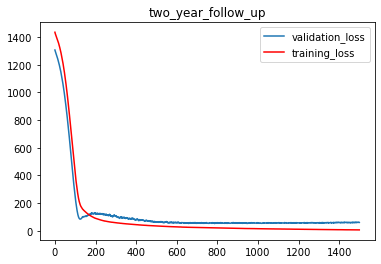

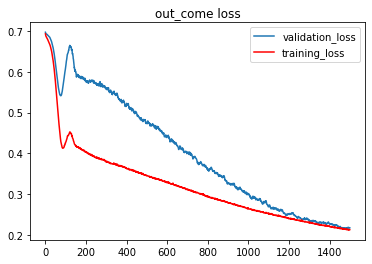

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_two_years_followup_mse'], label='validation_loss')
plt.plot(history.history['two_years_followup_mse'],'r',label='training_loss')
plt.legend()
plt.title('two_year_follow_up')
plt.show()

plt.plot(history.history['val_out_come_loss'],label = 'validation_loss')
plt.plot(history.history['out_come_loss'],'r',label = 'training_loss')
plt.legend()
plt.title('out_come loss')
plt.show()
plt.savefig('loss_functions.png')

In [20]:
predicted_final = model.predict(norm_final)

In [21]:
no_label_data['follow_up'] = np.round(predicted_final[1])
no_label_data['outcome'] = np.round(predicted_final[0])+1
no_label_data

,Gender,Bracing_age,Before.bracing.Cobb,C_DAR,Bracing.Risser.sign,Best.In_brace.Correction,follow_up,outcome
1,1.0,12.0,45.0,8.00,1.0,15.555556,50.0,1.0
7,2.0,13.0,40.0,8.00,2.0,12.500000,48.0,1.0
10,2.0,11.0,44.0,5.70,1.0,9.090909,62.0,1.0
11,2.0,13.0,45.0,8.00,2.0,15.555556,51.0,1.0
15,2.0,13.0,45.0,9.20,2.0,20.000000,50.0,1.0
...,...,...,...,...,...,...,...,...
159,2.0,13.0,40.0,6.66,2.0,40.000000,37.0,1.0
160,2.0,12.0,34.0,4.80,2.0,58.823529,31.0,1.0
161,2.0,10.0,27.0,3.85,0.0,44.444444,33.0,1.0
162,1.0,11.0,40.0,4.00,0.0,40.000000,34.0,1.0


In [23]:
indexes = no_label_data.index
counter = 0
new_data = data.iloc[:]
for i in range(len(new_data)):
    
    if(new_data.isna().iloc[i,-1] or new_data.isna().iloc[i,-2]):
        
        new_data.iloc[i,-1] = no_label_data.iloc[counter,-1]
        
        new_data.iloc[i,-2] = no_label_data.iloc[counter,-2]
        counter += 1
    

In [25]:
new_data.to_excel('C_DAR_after_filling_missing_and_final.xlsx')

In [ ]:
%config Completer.use_jedi = False